# Exploring ways to represent SMILES data

There are a number of ways to represent chemical data. The choice of method will depend on a number of factors, including:

- whether it should be human-reader friendly
- compatibility with other programs or algorithms (e.g., a ML model requiring a numerical input)
- space constraints

https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00460-5

https://arxiv.org/pdf/2210.16484

https://huggingface.co/katielink/MoLFormer-XL

https://www.sciencedirect.com/science/article/abs/pii/S135964462200366X#preview-section-references

https://darkomedin-datascience.medium.com/data-science-for-drug-discovery-research-morgan-fingerprints-using-alanine-and-testosterone-92a2c69dd765


### Possible Approaches:

- Take SMILES string and use pre-trained model to get embeddings rich in chemical information (MolFormer by IBM, ChemBERTa)

- Take fingerprints representation (Deeppurpose morgan fingerprints)

- Graph-based representations (convert SMILES to graph matrix, then use GNN to get fixed-length vector representation)

Graph representations:

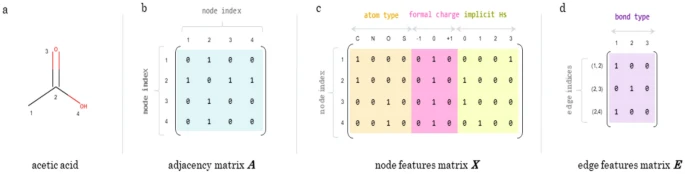

In [ ]:
!pip install descriptastorus
!pip install rdkit
!pip install DeepPurpose

In [ ]:
from DeepPurpose.utils import encode_drug
import pandas as pd

# Example list of SMILES strings representing drug molecules
smiles_list = pd.DataFrame(['O=C(C)Oc1ccccc1C(=O)O', 'CC(CC1=CC=CC=C1)C(=O)O', 'CN1CCN(CC1)C2=C(C=CC(=C2)OC)OC'], columns=['SMILES'])

# Encode the drug molecules
drug_encodings = encode_drug(smiles_list, drug_encoding='Morgan', column_name = 'SMILES', save_column_name = 'drug_encoding')

# Print the encoded representations
for x in drug_encodings['drug_encoding']:
    print(x.shape)

drug_encodings.head()

encoding drug...
unique drugs: 3
(1024,)
(1024,)
(1024,)


[17:36:40] DEPRECATION WARNING: please use MorganGenerator
[17:36:40] DEPRECATION WARNING: please use MorganGenerator
[17:36:40] DEPRECATION WARNING: please use MorganGenerator


,SMILES,drug_encoding
0,O=C(C)Oc1ccccc1C(=O)O,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,CC(CC1=CC=CC=C1)C(=O)O,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,CN1CCN(CC1)C2=C(C=CC(=C2)OC)OC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
import torch
from transformers import AutoTokenizer, AutoModel

# Load the pre-trained ChemBERTa-77M-MTR model and tokenizer
model_name = "DeepChem/ChemBERTa-77M-MTR"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Define your SMILES strings
smiles_list = ["CC(=O)OC1=CC=CC=C1C(=O)O", "CCO", "C1=CC=C(C=C1)C(=O)O"]

# Tokenize the SMILES strings
encoded_inputs = tokenizer(smiles_list, padding=True, truncation=True, return_tensors="pt")

# Generate embeddings
with torch.no_grad():
    outputs = model(**encoded_inputs)
    embeddings = outputs.last_hidden_state[:, 0, :]

# Print the embeddings
print(embeddings)

# If you want to convert

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/420 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[ 0.0333,  0.0236, -0.0453,  ...,  0.0048,  0.0452, -0.0582],
        [-0.2564,  0.1938,  0.0378,  ..., -0.0815, -0.2759, -0.0227],
        [-0.0473,  0.1279,  0.0004,  ..., -0.0474, -0.0316, -0.0664]])


Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[ 0.0333,  0.0236, -0.0453,  ...,  0.0048,  0.0452, -0.0582],
        [-0.2564,  0.1938,  0.0378,  ..., -0.0815, -0.2759, -0.0227],
        [-0.0473,  0.1279,  0.0004,  ..., -0.0474, -0.0316, -0.0664]])


In [ ]:
from helpers import build_DeepPurpose_features

